# Deep Learning models using Keras

Keras is a user-friendly neural network library written in Python. We will build a regression model to predict an employee's wage per hour.

Note: The datasets we will be using are relatively clean, so we will not perform any data preprocessing in order to get our data ready for modeling. Datasets that you will use in future projects may not be so clean - for example, they may have missing values - so you may need to use data preprocessing techniques to alter your datasets to get more accurate results.

# Linear Regression Model using Keras

For our regression deep learning model, the first step is to read in the data we will use as input. For this example, we are using the 'hourly wages' dataset. To start, we will use Pandas to read in the data. I will not go into detail on Pandas, but it is a library you should become familiar with if you're looking to dive further into data science and machine learning.

'df' stands for dataframe. Pandas read in the CSV file as a dataframe. The 'head()' function will show the first 5 rows of the dataframe so you can check that the data has been read in properly and can take an initial look at how the data is structured.

In [1]:
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

from keras import utils
from keras.utils import to_categorical

In [2]:
# Clone the entire repo.
!git clone -l -s https://github.com/cagBRT/IntroToDNNwKeras.git cloned-repo
%cd cloned-repo

Cloning into 'cloned-repo'...
remote: Enumerating objects: 462, done.
remote: Counting objects: 100% (125/125), done.
remote: Compressing objects: 100% (105/105), done.
remote: Total 462 (delta 85), reused 20 (delta 20), pack-reused 337
Receiving objects: 100% (462/462), 12.25 MiB | 15.84 MiB/s, done.
Resolving deltas: 100% (256/256), done.
/content/cloned-repo


In [3]:
#read in training data
wage_df = pd.read_csv('/content/cloned-repo/hourly_wage')

#view data structure
wage_df.head()
print(wage_df.shape)


(534, 10)


Next, we need to split up our dataset into inputs (train_X) and our target (train_y). Our input will be every column except 'wage_per_hour' because 'wage_per_hour' is what we will be attempting to predict. Therefore, 'wage_per_hour' will be our target.

We will use the pandas 'drop' function to drop the column 'wage_per_hour' from our dataframe and store it in the variable 'train_X'. This will be our input.

In [4]:
#create a dataframe with all training data except the target column
wage_data = wage_df.drop(columns=['wage_per_hour','marr'])

#check that the target variable has been removed
wage_data.head()

,union,education_yrs,experience_yrs,age,female,south,manufacturing,construction
0,0,8,21,35,1,0,1,0
1,0,9,42,57,1,0,1,0
2,0,12,1,19,0,0,1,0
3,0,12,4,22,0,0,0,0
4,0,12,17,35,0,0,0,0


In [5]:
#create a label column with only the target column
wage_y = wage_df[['wage_per_hour']]

#view dataframe
wage_y.head()

,wage_per_hour
0,5.10
1,4.95
2,6.67
3,4.00
4,7.50


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    wage_data, wage_y, test_size=0.20)

The model type that we will be using is Sequential. Sequential is the easiest way to build a model in Keras. It allows you to build a model layer by layer. Each layer has weights that correspond to the layer the follows it.

We use the 'add()' function to add layers to our model. We will add two layers and an output layer.

'Dense' is the layer type. Dense is a standard layer type that works for most cases. In a dense layer, all nodes in the previous layer connect to the nodes in the current layer.

We have 10 nodes in each of our input layers. This number can also be in the hundreds or thousands. Increasing the number of nodes in each layer increases model capacity. I will go into further detail about the effects of increasing model capacity shortly.

'Activation' is the activation function for the layer. An activation function allows models to take into account nonlinear relationships. For example, if you are predicting diabetes in patients, going from age 10 to 11 is different than going from age 60â??61.

The activation function we will be using is ReLU or Rectified Linear Activation. Although it is two linear pieces, it has been proven to work well in neural networks.

The first layer needs an input shape. The input shape specifies the number of rows and columns in the input. The number of columns in our input is stored in 'n_cols'. There is nothing after the comma which indicates that there can be any amount of rows.

The last layer is the output layer. It only has one node, which is for our prediction.

Next, we need to compile our model. Compiling the model takes two parameters: optimizer and loss.

The optimizer controls the learning rate. We will be using 'Adam' as our optimizer. Adam is generally a good optimizer to use for many cases. The Adam optimizer adjusts the learning rate throughout training.

The learning rate determines how fast the optimal weights for the model are calculated. A smaller learning rate may lead to more accurate weights (up to a certain point), but the time it takes to compute the weights will be longer.

For our loss function, we will use 'mean_squared_error'. It is calculated by taking the average squared difference between the predicted and actual values. It is a popular loss function for regression problems. The closer to 0 this is, the better the model performed.



In [7]:
#create model
model = Sequential()

#get number of columns in training data
n_cols = X_train.shape[1]

#add model layers
model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
model.add(Dense(40, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1))

#compile model using mse as a measure of model performance
model.compile(optimizer='adam', loss='mean_squared_error', metrics=["mean_squared_error"])

#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=3)

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                90        
                                                                 
 dense_1 (Dense)             (None, 40)                440       
                                                                 
 dense_2 (Dense)             (None, 40)                1640      
                                                                 
 dense_3 (Dense)             (None, 1)                 41        
                                                                 
Total params: 2211 (8.64 KB)
Trainable params: 2211 (8.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


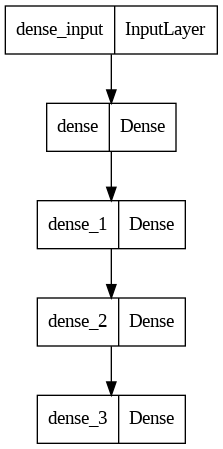

In [9]:
from keras.utils import plot_model
plot_model(model)

Now we will train our model. To train, we will use the 'fit()' function on our model with the following five parameters: training data (train_X), target data (train_y), validation split, the number of epochs and callbacks.

The validation split will randomly split the data into use for training and testing. During training, we will be able to see the validation loss, which gives the mean squared error of our model on the validation set. We will set the validation split at 0.2, which means that 20% of the training data we provide in the model will be set aside for testing model performance.

The number of epochs is the number of times the model will cycle through the data. The more epochs we run, the more the model will improve, up to a certain point. After that point, the model will stop improving during each epoch. In addition, the more epochs, the longer the model will take to run. To monitor this, we will use 'early stopping'.

Early stopping will stop the model from training before the number of epochs is reached if the model stops improving. We will set our early stopping monitor to 3. This means that after 3 epochs in a row in which the model doesn't improve, training will stop. Sometimes, the validation loss can stop improving then improve in the next epoch, but after 3 epochs in which the validation loss doesn't improve, it usually won't improve again.

In [10]:
#train model
model.fit(X_train, y_train, validation_split=0.2, epochs=60,
          callbacks=[early_stopping_monitor])

Epoch 1/60
11/11 [==============================] - 3s 46ms/step - loss: 49.2430 - mean_squared_error: 49.2430 - val_loss: 30.7875 - val_mean_squared_error: 30.7875
Epoch 2/60
11/11 [==============================] - 0s 16ms/step - loss: 35.4468 - mean_squared_error: 35.4468 - val_loss: 30.5296 - val_mean_squared_error: 30.5296
Epoch 3/60
11/11 [==============================] - 0s 14ms/step - loss: 31.8126 - mean_squared_error: 31.8126 - val_loss: 25.5702 - val_mean_squared_error: 25.5702
Epoch 4/60
11/11 [==============================] - 0s 10ms/step - loss: 28.6810 - mean_squared_error: 28.6810 - val_loss: 23.0127 - val_mean_squared_error: 23.0127
Epoch 5/60
11/11 [==============================] - 0s 9ms/step - loss: 25.9558 - mean_squared_error: 25.9558 - val_loss: 20.7721 - val_mean_squared_error: 20.7721
Epoch 6/60
11/11 [==============================] - 0s 11ms/step - loss: 24.1612 - mean_squared_error: 24.1612 - val_loss: 18.4702 - val_mean_squared_error: 18.4702
Epoch 7/60


Making predictions on new data

If you want to use this model to make predictions on new data, we would use the 'predict()' function, passing in our new data.
The output would be 'wage_per_hour' predictions.

In [11]:
wage_pred = model.predict(X_test)

4/4 [==============================] - 0s 5ms/step


In [12]:
y_test_wages=y_test[["wage_per_hour"]].values
#y_test_wages

In [13]:
print("prediction", "\tground truth")
for i in range(len(y_test_wages)):
  print(wage_pred[i],"\t", y_test_wages[i])

prediction 	ground truth
[8.99118] 	 [5.5]
[10.719826] 	 [13.65]
[7.219611] 	 [3.35]
[9.991867] 	 [5.79]
[7.332983] 	 [5.62]
[10.050729] 	 [6.25]
[12.166103] 	 [11.71]
[7.4948626] 	 [7.]
[9.921721] 	 [15.]
[10.197834] 	 [11.67]
[11.017025] 	 [6.]
[10.609407] 	 [7.38]
[10.386958] 	 [8.2]
[9.290888] 	 [8.]
[8.318327] 	 [3.35]
[9.612717] 	 [16.]
[9.123268] 	 [12.5]
[13.360672] 	 [6.25]
[10.648421] 	 [11.]
[7.120961] 	 [8.89]
[9.533756] 	 [5.5]
[7.2303185] 	 [4.8]
[12.58851] 	 [24.98]
[13.321785] 	 [7.]
[10.579687] 	 [10.]
[7.607346] 	 [7.]
[10.157364] 	 [10.53]
[12.699578] 	 [24.98]
[7.2844696] 	 [4.35]
[10.196777] 	 [11.25]
[12.007004] 	 [4.]
[8.988974] 	 [4.85]
[8.935561] 	 [8.43]
[9.533756] 	 [6.1]
[12.136696] 	 [6.88]
[7.615611] 	 [3.65]
[8.318974] 	 [4.5]
[8.991877] 	 [7.5]
[3.1320498] 	 [3.75]
[9.230248] 	 [6.]
[11.700806] 	 [5.5]
[10.086056] 	 [4.55]
[10.361034] 	 [16.65]
[9.269134] 	 [5.35]
[7.3558917] 	 [4.22]
[9.700937] 	 [13.26]
[8.185462] 	 [3.5]
[10.050729] 	 [7.96]
[9.925776

In [14]:
import numpy as np
from sklearn.metrics import mean_squared_error
rms_dnn_1=np.sqrt(mean_squared_error(y_test, wage_pred))
rms_dnn_1

4.7837831071710575

As you increase the number of nodes and layers in a model, the model capacity increases. Increasing model capacity can lead to a more accurate model, up to a certain point, at which the model will stop improving. Generally, the more training data you provide, the larger the model should be. We are only using a tiny amount of data, so our model is pretty small. The larger the model, the more computational capacity it requires and it will take longer to train.

Let's create a new model using the same training data as our previous model. This time, we will add a layer and increase the nodes in each layer to 200. We will train the model to see if increasing the model capacity will improve our validation score.

In [15]:
#training a new model on the same data to show the effect of increasing model capacity
#create model
model_mc = Sequential()

#add model layers
model_mc.add(Dense(10, activation='relu', input_shape=(n_cols,)))
model_mc.add(Dense(200, activation='relu'))
model_mc.add(Dense(200, activation='relu'))
model_mc.add(Dense(1))

#compile model using mse as a measure of model performance
model_mc.compile(optimizer='adam', loss='mean_squared_error', metrics=["mean_squared_error"])

In [16]:
model_mc.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                90        
                                                                 
 dense_5 (Dense)             (None, 200)               2200      
                                                                 
 dense_6 (Dense)             (None, 200)               40200     
                                                                 
 dense_7 (Dense)             (None, 1)                 201       
                                                                 
Total params: 42691 (166.76 KB)
Trainable params: 42691 (166.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


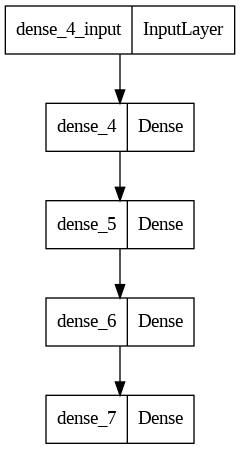

In [17]:
from keras.utils import plot_model
plot_model(model_mc)

In [18]:
#train model
model_mc.fit(X_train, y_train, validation_split=0.2,
             epochs=30, callbacks=[early_stopping_monitor])

Epoch 1/30
11/11 [==============================] - 3s 53ms/step - loss: 40.3315 - mean_squared_error: 40.3315 - val_loss: 23.0289 - val_mean_squared_error: 23.0289
Epoch 2/30
11/11 [==============================] - 0s 18ms/step - loss: 28.4031 - mean_squared_error: 28.4031 - val_loss: 23.1082 - val_mean_squared_error: 23.1082
Epoch 3/30
11/11 [==============================] - 0s 21ms/step - loss: 24.9437 - mean_squared_error: 24.9437 - val_loss: 18.9948 - val_mean_squared_error: 18.9948
Epoch 4/30
11/11 [==============================] - 0s 14ms/step - loss: 23.3758 - mean_squared_error: 23.3758 - val_loss: 18.3493 - val_mean_squared_error: 18.3493
Epoch 5/30
11/11 [==============================] - 0s 14ms/step - loss: 22.7248 - mean_squared_error: 22.7248 - val_loss: 17.5753 - val_mean_squared_error: 17.5753
Epoch 6/30
11/11 [==============================] - 0s 27ms/step - loss: 22.4447 - mean_squared_error: 22.4447 - val_loss: 17.9614 - val_mean_squared_error: 17.9614
Epoch 7/30

In [19]:
wage_pred_mc = model_mc.predict(X_test)

4/4 [==============================] - 0s 5ms/step


In [20]:
rms_dnn=np.sqrt(mean_squared_error(y_test, wage_pred_mc))
rms_dnn

4.790971095341918

In [21]:
#print("prediction", "\tground truth")
#for i in range(len(y_test_wages)):
#  print(wage_pred_mc[i],"\t", y_test_wages[i])


In [22]:
from sklearn.linear_model import LinearRegression
model_sklearn=LinearRegression().fit(X_train, y_train)
pred_sklearn=model_sklearn.predict(X_test)

In [23]:
model_sklearn.score(X_test, y_test)

0.3194992148452873

In [24]:
import numpy as np
from sklearn.metrics import mean_squared_error
rms_sklearn=np.sqrt(mean_squared_error(y_test, pred_sklearn))
rms_sklearn

4.443754074502131

In [25]:
print("sklearn model:", rms_sklearn)
print("dnn model:",rms_dnn)
print( "first dnn model:", rms_dnn_1)

sklearn model: 4.443754074502131
dnn model: 4.790971095341918
first dnn model: 4.7837831071710575




---



---





---



---



# Example OneHotEncoder

In [26]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
X = [['Male', 1], ['Female', 3], ['Female', 2]]
enc.fit(X)
enc.categories_
enc.transform([['Female', 1], ['Male', 4]]).toarray()
enc.inverse_transform([[0, 1, 1, 0, 0], [0, 0, 0, 1, 0]])
enc.get_feature_names_out(['gender', 'group'])

array(['gender_Female', 'gender_Male', 'group_1', 'group_2', 'group_3'],
      dtype=object)



---



---



#Activation Functions Most Commonly Used<br>
Sigmoid (Logistic)<br>
Hyperbolic Tangent (Tanh)<br>
Rectified Linear Unit (ReLU)<br>
Leaky ReLU<br>
Parametric Leaky ReLU (PReLU)<br>
Exponential Linear Units (ELU)<br>
Scaled Exponential Linear Unit (SELU)<br>

from keras.activations import ELU




---



---



# Binning

# Classification Model using Keras

The following code has some errors in it and it is missing some things that will make your life a little easier. <br>
Your assignment, improve this notebook

Now let's move on to building our model for classification. Since many steps will be a repeat from the previous model, I will only go over new concepts.


   Given is the attribute name, attribute type, the measurement unit and a
   brief description.  The number of rings is the value to predict: either
   as a continuous value or as a classification problem.

	Name		Data Type	Meas.	Description
	----		---------	-----	-----------
	Sex		nominal			M, F, and I (infant)
	Length		continuous	mm	Longest shell measurement
	Diameter	continuous	mm	perpendicular to length
	Height		continuous	mm	with meat in shell
	Whole weight	continuous	grams	whole abalone
	Shucked weight	continuous	grams	weight of meat
	Viscera weight	continuous	grams	gut weight (after bleeding)
	Shell weight	continuous	grams	after being dried
	Rings		integer			+1.5 gives the age in years


Predicting the age of abalone from physical measurements. The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. <br>
Other measurements, which are easier to obtain, are used to predict the age. <br>
Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

In [27]:
#read in training data
train_df_2 = pd.read_csv('abalone.data')

#view data structure
train_df_2.columns

Index(['M', '0.455', '0.365', '0.095', '0.514', '0.2245', '0.101', '0.15',
       '15'],
      dtype='object')

**Convert column 'M' to one-hot encoding**

In [28]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
train_df_2['M'] = LE.fit_transform(train_df_2['M'])
train_df_2

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,1,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10




---



---



# Binning Example

In [29]:
import pandas
bins_boundary = [5,10,15,20,25]
labels = ['0','1','2','3'] #labels
#CREATE BUCKETS
train_df_2_binned = pd.cut(train_df_2['15'], bins=bins_boundary, labels=labels)

In [30]:
train_df_2_binned

0       0
1       0
2       0
3       0
4       0
       ..
4171    1
4172    0
4173    0
4174    0
4175    1
Name: 15, Length: 4176, dtype: category
Categories (4, object): ['0' < '1' < '2' < '3']



---



---



In [31]:
cols=train_df_2.columns
train_df_2 = train_df_2.astype({'0.455':'float', '0.365':'float', '0.095':'float', '0.514':'float', '0.2245':'float', '0.101':'float', '0.15':'float'})

In [32]:
#create a dataframe with all training data except the target column
train_X_2 = train_df_2.drop(columns=['15'])
train_y = train_df_2[["15"]]
#check that the target variable has been removed
train_X_2.head()

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15
0,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
1,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
2,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
3,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055
4,1,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120


In [33]:
train_y.values

array([[ 7],
       [ 9],
       [10],
       ...,
       [ 9],
       [10],
       [12]])

In [34]:
#one-hot encode target column
train_y_2 = to_categorical(train_y,30)

#vcheck that target column has been converted
train_y_2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [35]:
train_y_2.shape

(4176, 30)

The activation is 'softmax'. Softmax makes the output sum up to 1 so the output can be interpreted as probabilities. The model will then make its prediction based on which option has a higher probability.

We will use 'categorical_crossentropy' for our loss function. This is the most common choice for classification. A lower score indicates that the model is performing better.

To make things even easier to interpret, we will use the 'accuracy' metric to see the accuracy score on the validation set at the end of each epoch.

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    train_X_2, train_y_2, test_size=0.20)

In [37]:
print(X_train.shape)
outputs=y_train.shape
print(outputs)

(3340, 8)
(3340, 30)


In [38]:
#create model
model_2 = Sequential()
#get number of columns in training data
inputs=X_train.shape[1]
#add layers to model
model_2.add(Dense(250, activation='relu', input_shape=(inputs,)))
model_2.add(Dense(250, activation='relu'))
model_2.add(Dense(250, activation='relu'))
model_2.add(Dense(250, activation='relu' ))
model_2.add(Dense(30, activation='softmax'))
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 250)               2250      
                                                                 
 dense_9 (Dense)             (None, 250)               62750     
                                                                 
 dense_10 (Dense)            (None, 250)               62750     
                                                                 
 dense_11 (Dense)            (None, 250)               62750     
                                                                 
 dense_12 (Dense)            (None, 30)                7530      
                                                                 
Total params: 198030 (773.55 KB)
Trainable params: 198030 (773.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
#compile model using accuracy to measure model performance
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
import numpy as np
y = np.asarray(train_y_2).astype(np.int32)
print(y[1])

[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [41]:
#train_X_2 = np.array([np.array(val) for val in train_X_2])

In [42]:
#train model
model_2.fit(X_train, y_train, epochs=30)

Epoch 1/30
105/105 [==============================] - 4s 11ms/step - loss: 2.4792 - accuracy: 0.1847
Epoch 2/30
105/105 [==============================] - 1s 11ms/step - loss: 2.1530 - accuracy: 0.2401
Epoch 3/30
105/105 [==============================] - 1s 11ms/step - loss: 2.0878 - accuracy: 0.2428
Epoch 4/30
105/105 [==============================] - 2s 15ms/step - loss: 2.0233 - accuracy: 0.2611
Epoch 5/30
105/105 [==============================] - 2s 14ms/step - loss: 2.0034 - accuracy: 0.2443
Epoch 6/30
105/105 [==============================] - 2s 15ms/step - loss: 1.9861 - accuracy: 0.2656
Epoch 7/30
105/105 [==============================] - 1s 11ms/step - loss: 1.9849 - accuracy: 0.2557
Epoch 8/30
105/105 [==============================] - 1s 5ms/step - loss: 1.9642 - accuracy: 0.2704
Epoch 9/30
105/105 [==============================] - 1s 5ms/step - loss: 1.9618 - accuracy: 0.2659
Epoch 10/30
105/105 [==============================] - 1s 5ms/step - loss: 1.9509 - accuracy:

In [43]:
loss, acc = model_2.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.274


**Assignment**<br>
Use the SkLearn library model for classification to compare with the accuracy of the DNN model.

In [44]:
#read in training data
train_df_2 = pd.read_csv('abalone.data', header=None)

#view data structure
train_df_2.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')

In [45]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
train_df_2[train_df_2.columns[0]] = LE.fit_transform(train_df_2.iloc[:,0])
train_df_2

,0,1,2,3,4,5,6,7,8
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [46]:
X_data = train_df_2.iloc[:,0:8]
y_data = train_df_2.iloc[:,8]

In [47]:
X_data

,0,1,2,3,4,5,6,7
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [48]:
y_data

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: 8, Length: 4177, dtype: int64

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_data,y_data, test_size=0.20)

In [50]:
X_train.shape

(3341, 8)

In [51]:
y_train.shape

(3341,)

In [52]:
from sklearn.linear_model import LogisticRegression
model_sklearn=LogisticRegression(multi_class='ovr', solver='liblinear').fit(X_train, y_train)
pred_sklearn=model_sklearn.predict(X_test)

In [53]:
model_sklearn.score(X_test, y_test)

0.2511961722488038



---



---



In [54]:
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


In [55]:
model_KNN=KNeighborsClassifier().fit(X_train,y_train)
model_KNN.score(X_test, y_test)

0.23444976076555024

In [56]:
model_svc=SVC().fit(X_train, y_train)
model_svc.score(X_test, y_test)

0.2511961722488038